# Lab 2:  Electric Field Mapping

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
# Lab Members: Tyler/Sky Cicci, Alex Zannelli, Atticus Wingfield, Noah Kneessi
# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = False
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

# Parallel Plates - Small Distance

In [5]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [V, dV, x_cm, dx_cm]

data = [[2.00,0.02,1.70,0.01], [4.00,0.02,3.10,0.01], 
        [6.00,0.02,4.3,0.01], [8.00,0.02,5.55,0.01], [10.00,0.02,6.20,0.01]]
# create dataframe
df = pd.DataFrame(data, columns = ['V', 'dV','x_cm','dx_cm'])

print(df.to_string(index=False))

   V   dV  x_cm  dx_cm
 2.0 0.02  1.70   0.01
 4.0 0.02  3.10   0.01
 6.0 0.02  4.30   0.01
 8.0 0.02  5.55   0.01
10.0 0.02  6.20   0.01


In [6]:
df['x'] = 0.01*df['x_cm']
df['dx'] = 0.01*df['dx_cm']

print(df.to_string(index=False))

   V   dV  x_cm  dx_cm      x     dx
 2.0 0.02  1.70   0.01 0.0170 0.0001
 4.0 0.02  3.10   0.01 0.0310 0.0001
 6.0 0.02  4.30   0.01 0.0430 0.0001
 8.0 0.02  5.55   0.01 0.0555 0.0001
10.0 0.02  6.20   0.01 0.0620 0.0001


Beta: [173.33485325  -1.22806334]
Beta Std Error: [11.61421073  0.51992142]
Beta Covariance: [[ 0.52843647 -0.0220358 ]
 [-0.0220358   0.00105898]]
Residual Variance: 255.2622658586255
Inverse Condition #: 0.01587061928753176
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (173.334853247 +/- 11.614210731) X + (-1.228063337 +/- 0.519921420)


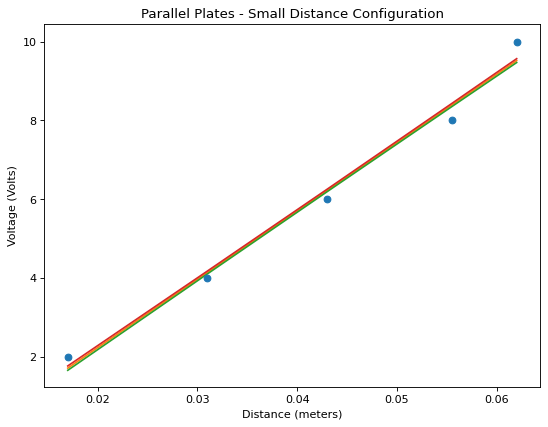

In [7]:
xi = df['x']
yi = df['V']
sigmaxi = df['dx']
sigmayi = df['dV']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Distance (meters)')
plt.ylabel('Voltage (Volts)')
plt.title('Parallel Plates - Small Distance Configuration')
plt.show()

In [8]:
# Expected Electric Field calculation

d_plates = 8.5*0.01
dd_plates = 0.05*0.01

V_plates = 12.0
dV_plates = 0.1

E_expected = V_plates/d_plates
dE_expected = E_expected*(dV_plates/V_plates+dd_plates/d_plates)

print("Expected Electric Field = %0.1f +/- %0.1f" % (E_expected,dE_expected))

Expected Electric Field = 141.2 +/- 2.0


## Analysis of Voltage vs. Position Result

First of all, we see that this is a pretty good linear fit!

Second, we see that the result for the y-intercept (b) is $(0.494 \pm 0.082)$ Volts.  This is close to zero, but still inconsistent with our expectations.

Third, we see that the average electric field (the slope) that we were trying to determine is
$(169.9 \pm 2.3)$ Volts per meter.  Based on the calculation of the expected value (in the next cell), we are not in agreement with that result.  Why?

# Parallel Plates - Large Distance

Complete the analysis for the large distance configuration, based on the analysis above.

The fit of the graph is linear which is good, and in line with our expectations.
The result for the y intercept is $(-1.23 +/- 0.520)$ volts which isnt super close to zero, but not too far either. However it is still inconsistent with our expectation that it would be zero.

We can see that the average electric field(determined by the slope) is $(173.3 +/- 11.6)$ volts per meter. Which is quite far off from the expected value of $(141.2 +/- 2.0)$ volts per meter, and is not within the bounds of uncertainty. There is probably something in out execution of the experiment, it could be errors when measuring volts, or the choice of how we measured distance. In our experiment we measured the distance from each of the volt markings to 0 volts, however something could be said about how this could change if we changed how we measured distance, such as if we measured from the center.